# Comparison of Naive bayes and logistic regression

In [6]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import pandas as pd
#-------------------------LOGISTIC REGRESSION-------------------------
voc = bv.get_vocabulary(path='../dataset/', numWords=6000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

w, b = pvml.logreg_train(
    X_train, Y_train, lambda_=0.00001, lr=0.003, steps=800, init_w=None, init_b=0)

P_lr = pvml.logreg_inference(X_valid, w, b)
prediction_lr = (P_lr > 0.5)
accuracy_validation_lr = (prediction_lr == Y_valid).mean()

#-------------------------NAIVE BAYES--------------------------------

w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
prediction_nb, score= pvml.multinomial_naive_bayes_inference(
    X_valid, w, b)
accuracy_valid_NB=(prediction_nb==Y_valid).mean()

print("Naive byes accuracy : ", accuracy_valid_NB*100)
print("Logistic regression accuracy : ", accuracy_validation_lr*100)


Naive byes accuracy :  96.6
Logistic regression accuracy :  96.525


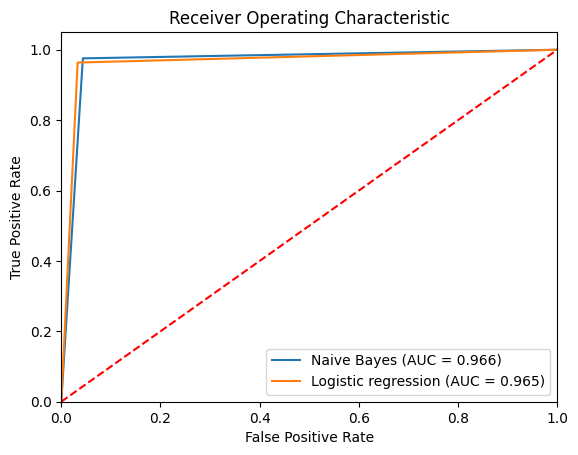

In [7]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

fpr_naive, tpr_naive, thresholds_gnb = roc_curve(Y_valid, prediction_nb)
auc_naive = roc_auc_score(Y_valid, prediction_nb)

fpr_lr, tpr_lr, thresholds_gnb = roc_curve(Y_valid, prediction_lr)
auc_lr = roc_auc_score(Y_valid, prediction_lr)


plt.plot(fpr_naive, tpr_naive,label='Naive Bayes (AUC = {:.3f})'.format(auc_naive))
plt.plot(fpr_lr, tpr_lr,label='Logistic regression (AUC = {:.3f})'.format(auc_lr))
# Diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()